### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [7]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:n_components=2, learning_rate=250, random_state=42.


In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [34]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

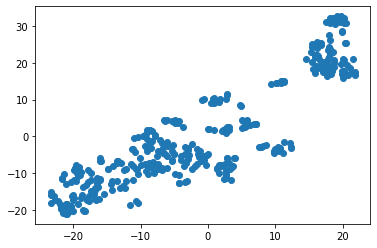

In [39]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [40]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
new_clasters = model.fit_predict(X_train_tsne)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

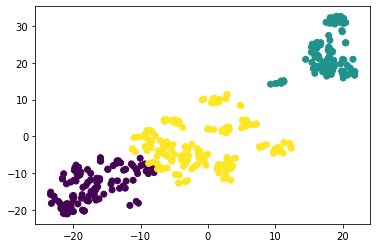

In [53]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=new_clasters)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [96]:
CRIM_mean_1 = X_train.CRIM.loc[new_clasters == 0].mean()

In [97]:
CRIM_mean_2 = X_train.CRIM.loc[new_clasters == 1].mean()

In [98]:
CRIM_mean_3 = X_train.CRIM.loc[new_clasters == 2].mean()

In [99]:
print('Первый кластер {}'.format(CRIM_mean_1))
print('Второй кластер {}'.format(CRIM_mean_2))
print('Третий кластер {}'.format(CRIM_mean_3))

Первый кластер 0.09861548076923077
Второй кластер 12.43135366666667
Третий кластер 0.6203881874999999


In [101]:
y_train_new = pd.DataFrame(y_train)
price_mean_1 = y_train_new.loc[new_clasters == 0].mean()

In [102]:
price_mean_2 = y_train_new.loc[new_clasters == 1].mean()

In [103]:
price_mean_3 = y_train_new.loc[new_clasters == 2].mean()

In [104]:
print('Первый кластер {}'.format(price_mean_1))
print('Второй кластер {}'.format(price_mean_2))
print('Третий кластер {}'.format(price_mean_3))

Первый кластер 0    26.436538
dtype: float64
Второй кластер 0    16.592222
dtype: float64
Третий кластер 0    24.405625
dtype: float64


### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [105]:
X_train_tsne = tsne.fit_transform(X_test_scaled)

In [106]:
newone_clusters = model.fit_predict(X_test_scaled)
newone_clusters

array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2],
      dtype=int32)

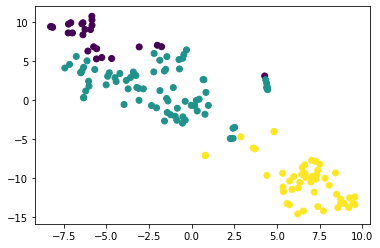

In [107]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=newone_clusters)
plt.show()

In [109]:
CRIM_mean_1 = X_test.CRIM.loc[newone_clusters == 0].mean()
CRIM_mean_2 = X_test.CRIM.loc[newone_clusters == 1].mean()
CRIM_mean_3 = X_test.CRIM.loc[newone_clusters == 2].mean()

In [110]:
print('Первый кластер {}'.format(CRIM_mean_1))
print('Второй кластер {}'.format(CRIM_mean_2))
print('Третий кластер {}'.format(CRIM_mean_3))

Первый кластер 0.06851119999999997
Второй кластер 0.29457153846153855
Третий кластер 11.743134897959182


In [112]:
y_test_new = pd.DataFrame(y_test)
price_mean_1 = y_test_new.loc[newone_clusters == 0].mean()
price_mean_2 = y_test_new.loc[newone_clusters == 1].mean()
price_mean_3 = y_test_new.loc[newone_clusters == 2].mean()

In [113]:
print('Первый кластер {}'.format(price_mean_1))
print('Второй кластер {}'.format(price_mean_2))
print('Третий кластер {}'.format(price_mean_3))

Первый кластер 0    30.492
dtype: float64
Второй кластер 0    21.991026
dtype: float64
Третий кластер 0    15.844898
dtype: float64
